#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Diego Miguel Trujillo Sierra
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
* Aplicarás matrices de confusión y medirás la precisión.
* Graficarás mapas de calor a partir de la matriz de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


## 0. Importar librerías y funciones básicas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%run '/content/drive/MyDrive/Colab Notebooks/Functions.ipynb'

In [ ]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd


# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

## 1. Realizar EDA para comprender mejor el dataset

In [ ]:
# Importar archivo
df = pd.read_csv('/content/drive/MyDrive/UCamp/M3/rrhh.csv')

In [ ]:
df.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


   Experiencia     Posicion  Hijos  Casado     Educacion  Salario
0          0.5     Analista      4       1  Bachillerato    13540
1          5.6     Analista      2       0  Licenciatura    31240
2         11.7     Analista      1       0  Licenciatura    63880
3          5.2     Analista      2       1  Licenciatura    29960
4          7.2  Coordinador      2       1  Licenciatura    34710
Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB
None

Estadísticas descriptivas:
       Experiencia        Hijos 

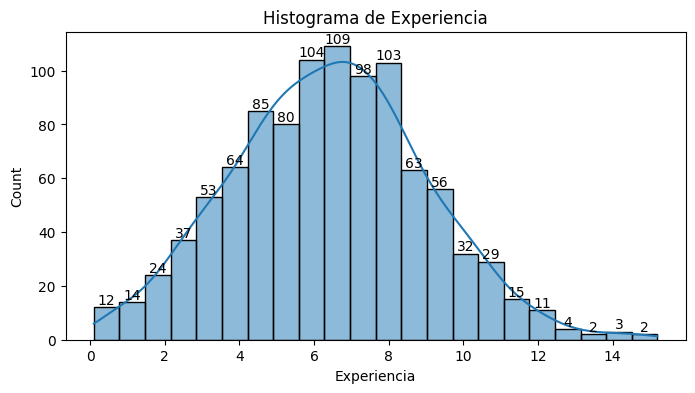

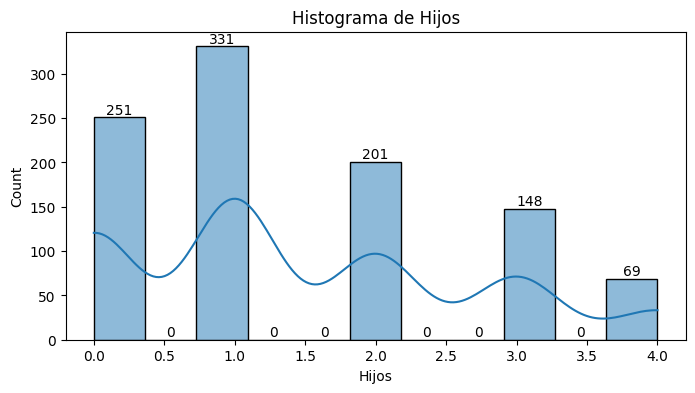

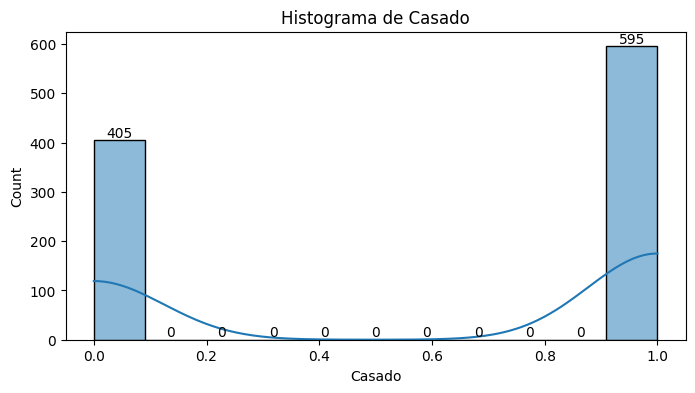

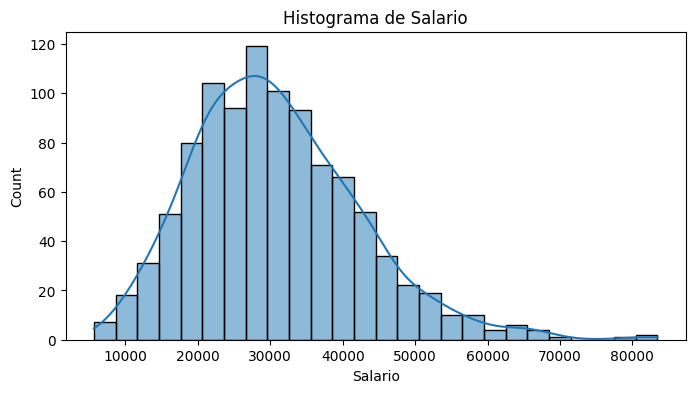

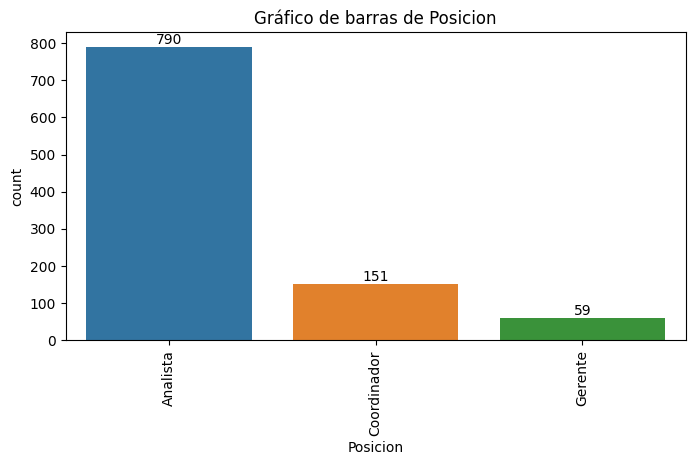

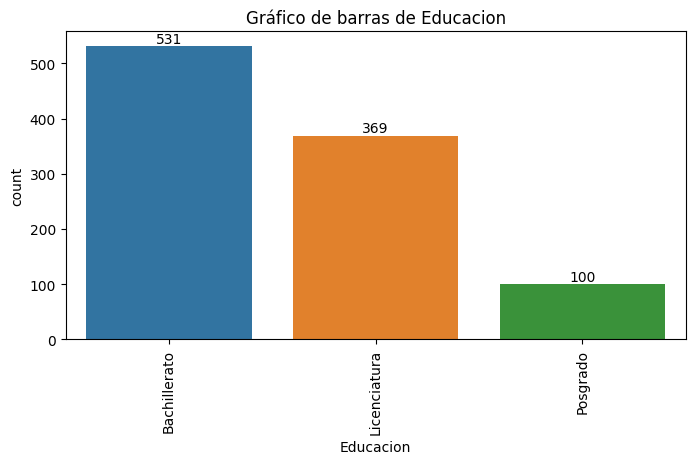


Matriz de Correlación:


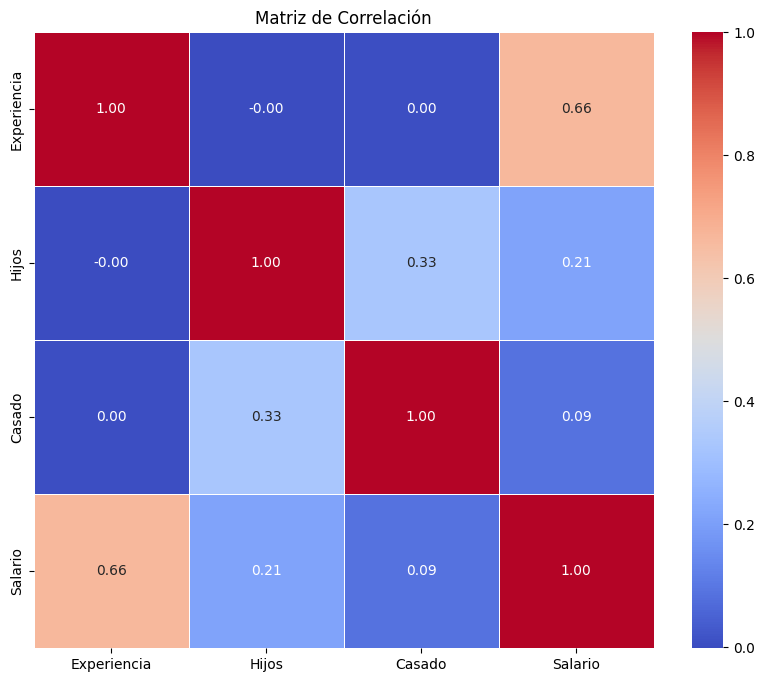

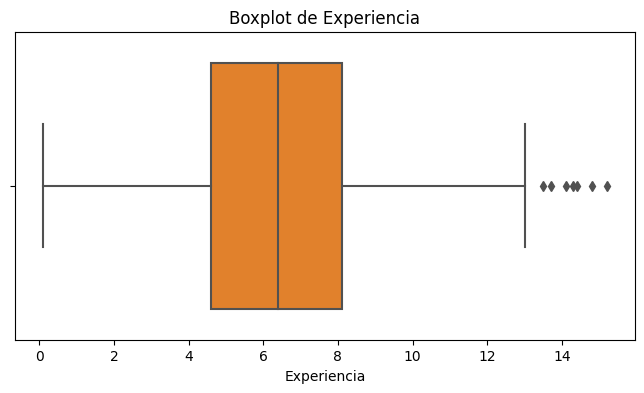

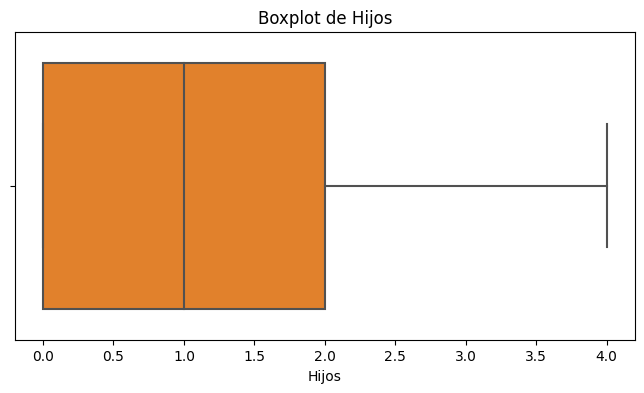

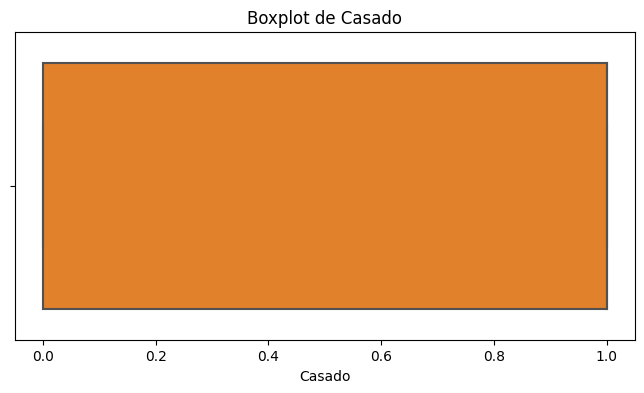

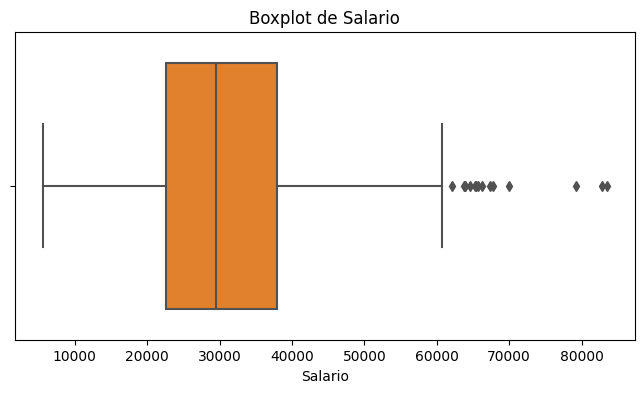


Matriz de Dispersión para Multicolinealidad Visual:


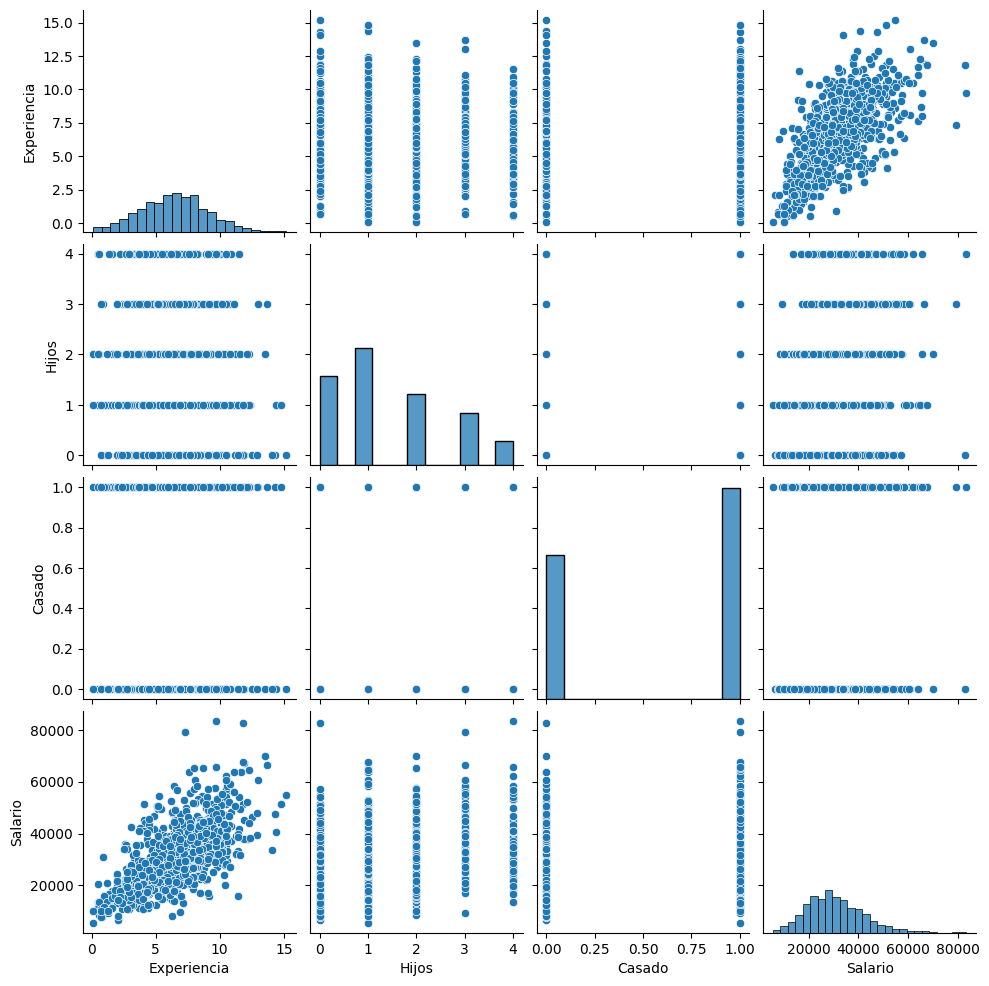

In [ ]:
realizar_eda(df)

### Resumen de estadísticas descriptivas:
El análisis de estadísticas descriptivas de este dataset de 1000 individuos muestra que la experiencia laboral promedio es de 6.4 años, con una variabilidad moderada. En promedio, los individuos tienen 1.45 hijos y aproximadamente el 60% están casados, reflejando una distribución balanceada entre casados y solteros. El salario promedio es de $30,787 con una amplia gama entre el salario más bajo y el más alto. Estos datos sugieren una fuerza laboral con diversidad en experiencia, estado civil y compensación económica.
por lo que no es necesaria la limpieza de datos.

## 2. Crear dummies para datos categóricos

In [ ]:
df = Dummies(df, ['Posicion','Educacion'])

In [ ]:
df.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,1,0,0,1,0,0
1,5.6,2,0,31240,1,0,0,0,1,0
2,11.7,1,0,63880,1,0,0,0,1,0
3,5.2,2,1,29960,1,0,0,0,1,0
4,7.2,2,1,34710,0,1,0,0,1,0


Para este dataset no se considera necesario estandarizar variables, ya que ninguna supera seis cifras, de forma que no se considera que pueda afectar a la efectivad del modelo.

## 3. Crear el train test split

In [ ]:
# Definición la variable target (Salario)
y = df['Salario']

In [ ]:
# Definición el conjunto de variables independientes
X = df.drop('Salario', axis = 1)

In [ ]:
# División en conjuntos prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 4. Entrenar y aplicar modelo de regresión lineal

In [ ]:
modelo_LinReg = LinearRegression()
modelo_LinReg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = modelo_LinReg.predict(X_test)

In [ ]:
prediccion_y = modelo_LinReg.predict(X)

In [ ]:
pd.DataFrame({'Realidad': y_test,
              'Prediccion': y_pred}).head()

,Realidad,Prediccion
22,37060,42987.816400
295,28740,23988.318391
888,28310,27631.006317
630,64600,66815.419248
675,19950,27488.187655


(Nota: Debido a la aleatoriedad del modelo, puede haber variaciones en las cantidades que arroje el código con la explicación)

Las diferencias entre los valores reales y las predicciones parecen ser relativamente pequeñas en los ejemplos proporcionados, lo que sugiere que el modelo tiene una buena precisión en estos puntos.

Por ejemplo, para el primer registro, la predicción del modelo es de 32,661.84 frente a un valor real de $32,880, lo que da un error de 218.16, que es menos del 1% del valor real.

Para el segundo y tercer registro, las predicciones son 29,181.04 y 30,133.39 respectivamente, lo que resulta en errores de 3,011.04 y 1,103.39. Aunque estos errores son más grandes en términos absolutos que el primero, siguen siendo relativamente pequeños en comparación con los valores del dataset real.

Los dos últimos registros muestran predicciones que están muy cerca de los valores reales, con una diferencia de tan solo 42.15 y 243.92 respectivamente.

## 4. Evaluación del modelo

### a. R^2

In [ ]:
# Revisión la medida de R^2 de la regresión anterior
modelo_LinReg.score(X,y)

0.6935481563061145

El modelo de regresión lineal presentó un R^2 de 0.694, reflejando que las variables seleccionadas explican aproximadamente el 69.4% de la variabilidad en los salarios. Sin embargo, con un 30.6% de la variabilidad no explicada, hay margen para optimizar el modelo. Una evaluación más detallada y la validación cruzada son esenciales para asegurar la precisión y la generalización del modelo.

### b. Error absoluto medio (MAE)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 4733.561097791536


El análisis del modelo de regresión para la predicción de salarios arroja un Error Absoluto Medio (MAE) de alrededor de 4,600, una cifra sustancial considerando el rango salarial del dataset, que oscila entre $5,630 y $83,470. Este nivel de MAE indica que el modelo tiene limitaciones en términos de precisión, lo cual puede ser crítico dependiendo de la aplicación práctica del modelo. Muy probablemente se necesiten más datos para considerar el salario exacto que podría tener un trabajador.

## Conclusión

A pesar de que el modelo parece funcionar bien. Sigue existiendo un error significativo. El modelo se podría utilizar de forma orientativa, pero se necesitan considerar más elementos, como la ubicación geográfica del puesto, las habilidades específicas de cada puesto, las habilidades específicas de cada candidato (como certificaciones, cursos, idiomas, etc), etc.

## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/UCamp/M3/rrhh_2.csv')

## 1. Crear dummies

In [ ]:
df2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [ ]:
cols_cat = df2.select_dtypes(include=['object']).columns
df2 = pd.get_dummies(df2, columns=cols_cat, drop_first=True)

## 2. Separar los conjuntos

In [ ]:
X = df2.drop('Contratado', axis=1)
y = df2['Contratado']

## 3. Crear sets de entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Estandarizar con Standard Scaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Creación de la regresión logística

In [ ]:
modreg = LogisticRegression()
modreg.fit(X_train_scaled, y_train)
y_pred = modreg.predict(X_test_scaled)

In [ ]:
y_pred


array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0])

In [ ]:
pd.DataFrame({'Realidad': y_test,
              'Prediccion': y_pred}).head()

,Realidad,Prediccion
521,1,0
737,1,1
740,0,0
660,0,0
411,0,0


## 6. Matriz de confusión y Mapa de calor

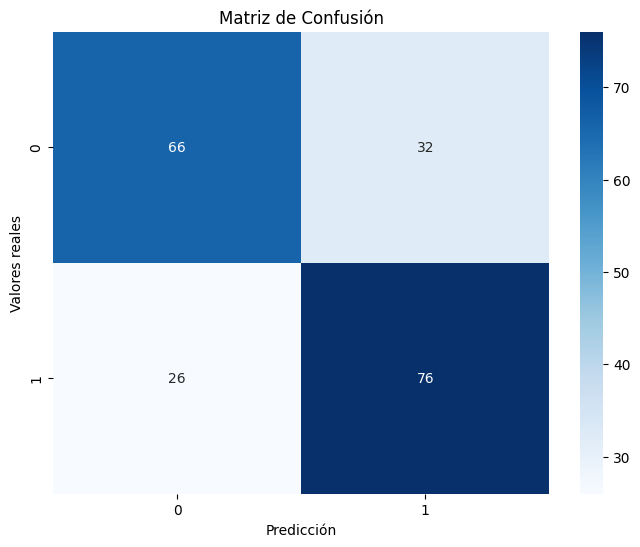

In [ ]:
matriz_conf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.show()

(Nota: Debido a la aleatoriedad del modelo, puede haber variaciones en las cantidades que arroje el código con la explicación)
La matriz de confusión presentada muestra los resultados de un modelo de clasificación. Se observan 66 verdaderos positivos, indicando una correcta identificación de las instancias positivas, y 76 verdaderos negativos, representando una correcta clasificación de las instancias negativas. Sin embargo, el modelo también produjo 26 falsos positivos, clasificando erróneamente algunas instancias negativas como positivas, y 39 falsos negativos, donde algunas instancias positivas fueron incorrectamente clasificadas como negativas.

## 7. Score de precisión

In [ ]:
precision = accuracy_score(y_test, y_pred)
precision


0.71

### Análisis del Score de Precisión

El modelo de regresión ha generado un score de precisión del 71%, como se puede observar en el output de la celda de código. Este resultado sugiere que, aunque el modelo tiene una capacidad limitada para predecir si un trabajador es contratado o no con exactitud, logra hacerlo correctamente casi tres cuartas partes de las veces. Podría ser útil para crear una lista final de candidatos por entrevistar, pero hay más factores que se deberían tomar en cuenta, de la misma forma que en el primer modelo sobre el salario.


# Modelo de Árbol de decisión

Importar el dataset de nuevo y crear los conjuntos para realizar el árbol de decisión.

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/UCamp/M3/rrhh_2.csv')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df3['Posicion'] = label_encoder.fit_transform(df3['Posicion'])
df3['Educacion'] = label_encoder.fit_transform(df3['Educacion'])

In [ ]:
X = df3.drop('Contratado', axis=1)
y = df3['Contratado']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


DecisionTreeClassifier()

### Precisión del árbol de decisión

In [ ]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del árbol de decisión es: {accuracy}")

La precisión del árbol de decisión es: 0.895


### Visualización del árbol de decisión

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [ ]:
dot_data = export_graphviz(tree, out_file=None,
                            feature_names=X.columns,
                            class_names=['No contratado', 'Contratado'])

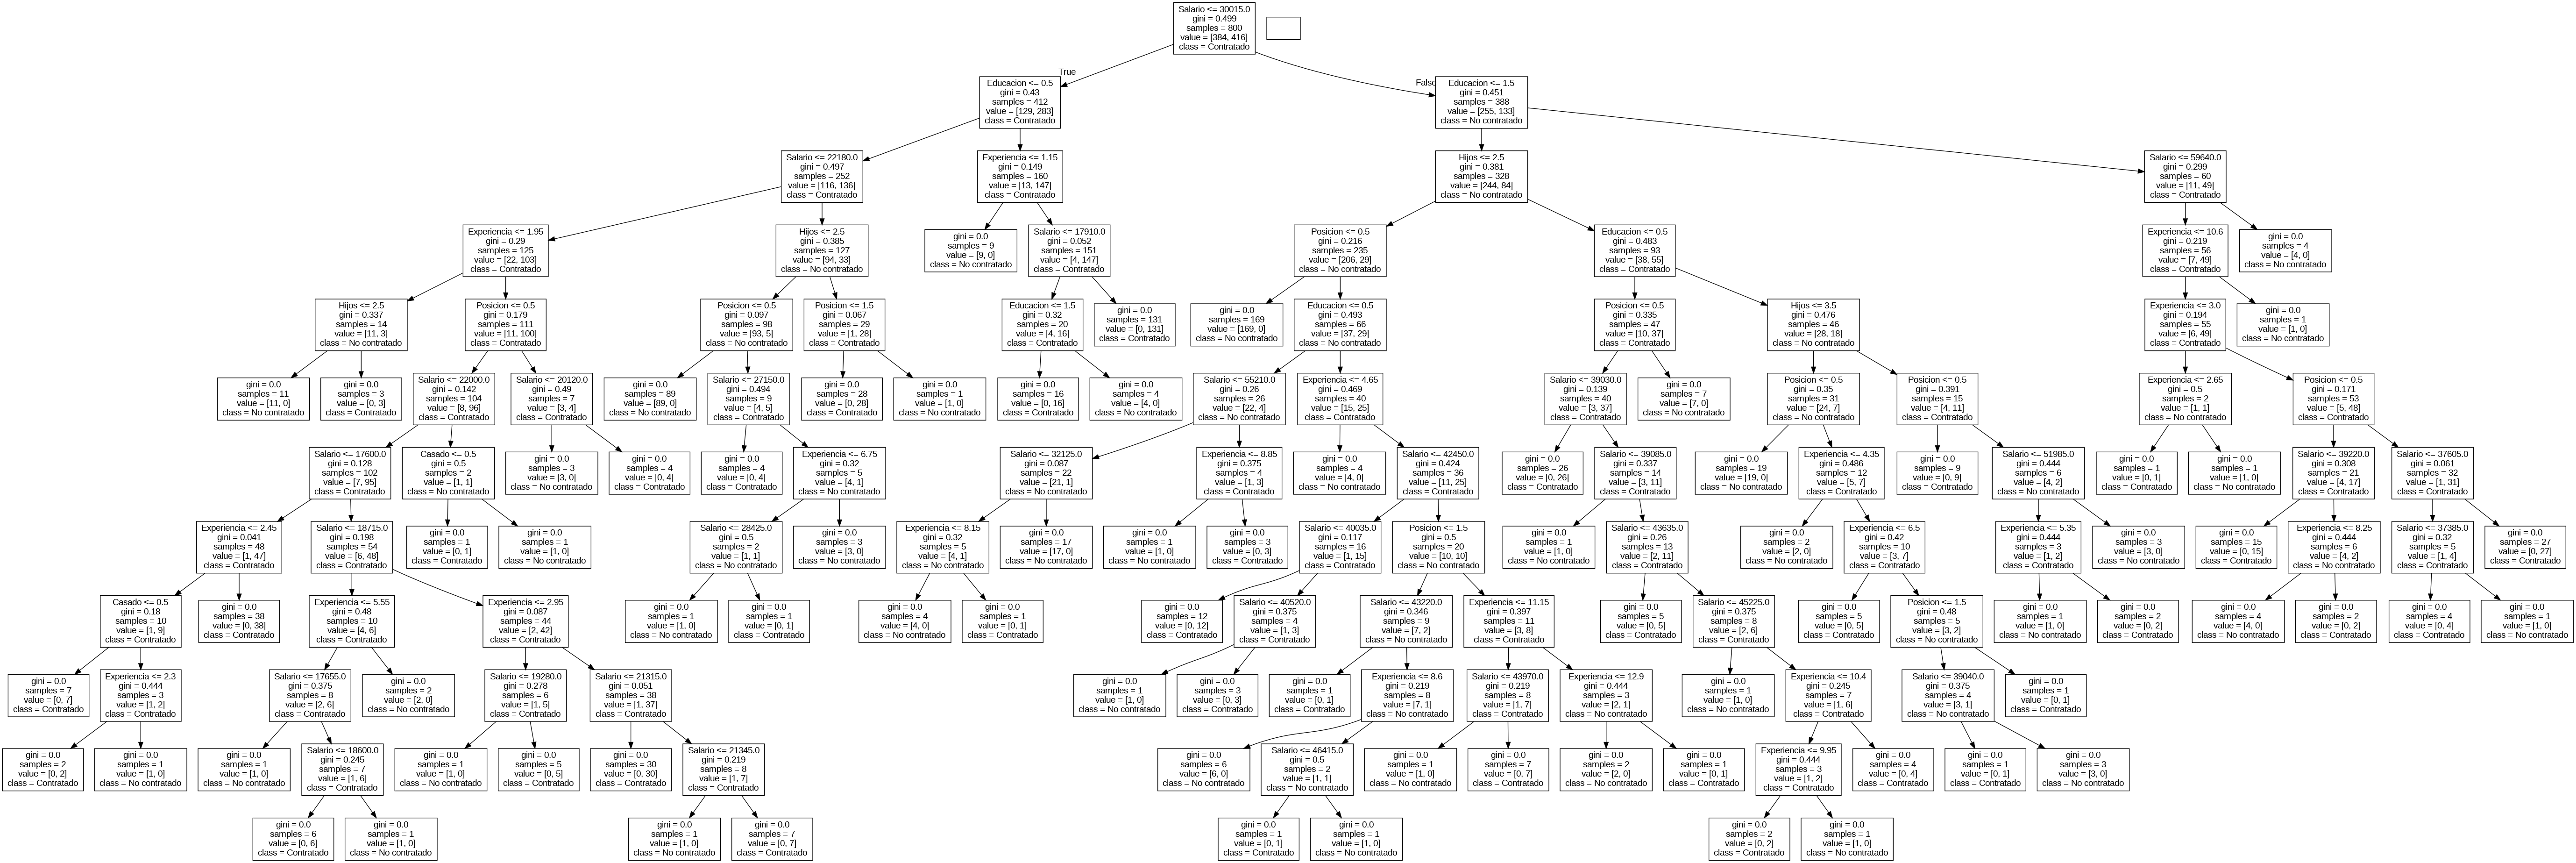

In [ ]:
graf_arbol = pydotplus.graph_from_dot_data(dot_data)
Image(graf_arbol.create_png())

### Ejemplo de aspirante

In [ ]:
posiciones_conocidas = np.unique(df3['Posicion'].tolist() + ['Analista'])
educacion_conocida = np.unique(df3['Educacion'].tolist() + ['Licenciatura'])
label_encoder_posicion = LabelEncoder().fit(posiciones_conocidas)
label_encoder_educacion = LabelEncoder().fit(educacion_conocida)

df3['Posicion'] = label_encoder_posicion.transform(df3['Posicion'])
df3['Educacion'] = label_encoder_educacion.transform(df3['Educacion'])

In [ ]:
aspirante = pd.DataFrame({
    'Experiencia': [5.0],
    'Posicion': ['Analista'],
    'Hijos': [2],
    'Casado': [1],
    'Educacion': ['Licenciatura'],
    'Salario': [30000]
})

In [ ]:
aspirante['Posicion'] = label_encoder_posicion.transform(aspirante['Posicion'])
aspirante['Educacion'] = label_encoder_educacion.transform(aspirante['Educacion'])

In [ ]:
prediccion = tree.predict(aspirante)
if prediccion == 1:
    print("El aspirante probablemente será contratado.")
else:
    print("El aspirante probablemente no será contratado.")

El aspirante probablemente será contratado.


## Conclusión del árbol de decisión:

El modelo de árbol de decisión implementado demostró ser una herramienta robusta y efectiva para predecir la probabilidad de contratación de aspirantes, alcanzando una impresionante precisión del 89.5% en el conjunto de prueba. Esta alta tasa de precisión indica que el modelo es capaz de capturar de manera efectiva las relaciones y patrones subyacentes entre las características de los aspirantes y sus resultados de contratación. Sin embargo, es importante considerar la posibilidad de sobreajuste, así como la relevancia de las variables seleccionadas en la predicción.

En futuros trabajos, sería beneficioso explorar técnicas de validación cruzada, ajuste de hiperparámetros y la incorporación de más datos para mejorar la generalización del modelo. Además, estudiar la importancia de las características podría ofrecer insights valiosos para comprender mejor qué factores contribuyen más significativamente a las decisiones de contratación. En resumen, el árbol de decisión se presenta como un método prometedor y comprensible para la toma de decisiones en el ámbito de la contratación, pero como con cualquier modelo de aprendizaje automático, su rendimiento debe ser monitoreado y evaluado continuamente en el contexto de datos nuevos y cambiantes.